In [ ]:
# !wget https://github.com/gouthamcm/recruit/raw/master/Entity%20Recognition%20in%20Resumes.tsv

--2020-06-19 07:31:55--  https://github.com/gouthamcm/recruit/raw/master/Entity%20Recognition%20in%20Resumes.tsv
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gouthamcm/recruit/master/Entity%20Recognition%20in%20Resumes.tsv [following]
--2020-06-19 07:31:55--  https://raw.githubusercontent.com/gouthamcm/recruit/master/Entity%20Recognition%20in%20Resumes.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56131561 (54M) [text/plain]
Saving to: ‘Entity Recognition in Resumes.tsv’

Entity Recognition  100%[===================>]  53.53M   160MB/s    in 0.3s    

2020-06-19 07:32:01 (160 MB/s) - ‘En

In [ ]:
# import pandas as pd

# df = pd.read_csv('/content/Entity Recognition in Resumes.tsv', sep='\t')

In [ ]:
# df.head()

,Abhishek,Name
0,Jha,Name
1,Application,Designation
2,Development,Designation
3,Associate,Designation
4,-,O


In [ ]:
# from tqdm.notebook import tqdm

# ids = []

# for i, text in tqdm(enumerate(df.Abhishek)):
#     if not str(text).strip():
#         ids.append(i)

In [ ]:
len(ids)

74

In [ ]:
# data =  df.drop(index=ids)

In [ ]:
data.shape, df.shape

((5329848, 2), (5329922, 2))

In [ ]:
# data.Name.replace(to_replace='Can Relocate to', value='Relocate to', regex=False, inplace=True)
# data.Name.replace(to_replace='des', value='Designation', regex=False, inplace=True)
# data.Name.replace(to_replace='abc', value='O', regex=False, inplace=True)
# data.Name.replace(to_replace='work experience', value='Years of Experience', regex=False, inplace=True)
# data.Name.replace(to_replace='College Name', value='College', regex=False, inplace=True)
# data.Name.replace(to_replace='University', value='College', regex=False, inplace=True)
# data.Name.replace(to_replace='state', value='Location', regex=False, inplace=True)
# data.Name.replace(to_replace='Links', value='links', regex=False, inplace=True)

In [ ]:
# data[data.Abhishek == '.'].head()

,Abhishek,Name
928,.,O
3063,.,O
5746,.,O
6498,.,O
9243,.,O


In [ ]:
# data = data[:5000]


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Ideas/Resume_Analyser/Engineering/CV_Dataset/bert_relabled_v2.csv')

In [ ]:
train_df = data[0:int(len(data)*0.8)]
test_df =  data[int(len(data)*0.8):int(len(data)*0.9)]
dev_df = data[int(len(data)*0.9):]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
int(len(data)*0.8)

4263878

In [ ]:
train_df.shape, test_df.shape, dev_df.shape

((4263878, 3), (532985, 3), (532985, 3))

In [ ]:
data.head()

,SenID,Tokens,Labels
0,0,Jha,B-NAME
1,0,Application,B-DES
2,0,Development,I-DES
3,0,Associate,I-DES
4,0,-,O


#Prepare datasets

In [ ]:
from tqdm.notebook import tqdm


tokens = []
labels = []
ids = []

prev_label = ""

count = 0
sen_id = 0

for i in tqdm(range(len(dev_df))):
  row = dev_df.iloc[i]
  token = row.Tokens
  label = row.Labels

  if count > 100:
    if prev_label != label:
      tokens.append(" ")
      labels.append(' ')
      # sen_id += 1
      count = 0
    elif label == 'O':
      tokens.append(" ")
      labels.append(' ')
      count = 0
      # sen_id += 1
  
  tokens.append(token)
  labels.append(label)
  # ids.append(sen_id)
  prev_label = label
  count += 1

In [ ]:
len(tokens), len(labels)

(538207, 538207)

In [ ]:
di = {
    
    "Tokens": tokens,
    "Labels": labels
}

devd = pd.DataFrame(di)

In [ ]:
devd.Labels.unique()

array(['O', 'B-SKILL', 'B-DES', 'I-DES', 'B-COM', 'I-COM', ' ',
       'B-College Name', 'I-College Name', 'I-SKILL', 'B-NAME', 'I-NAME',
       'B-LOC', 'B-EMAIL', 'B-DEG', 'I-DEG', 'I-LOC', 'I-EMAIL', 'B-YOE',
       'I-YOE', 'B-GRAD', 'I-GRAD', 'B-UNK', 'I-UNK', 'B-Can Relocate to',
       'B-Links', 'I-Links', 'I-Can Relocate to', 'B-RAA', 'I-RAA',
       'B-RLOC', 'I-RLOC', 'B-ADD', 'I-ADD', 'B-CER', 'I-CER', 'B-state',
       'B-University', 'I-University', 'B-LINK', 'I-LINK', 'B-COL',
       'I-COL', 'B-PRO', 'I-PRO', 'B-TRAIN', 'I-TRAIN', 'I-state',
       'B-des', 'I-des', 'B-abc'], dtype=object)

In [ ]:
devd.to_csv("dev.txt", sep='\t', index=False)

In [ ]:
devd[95:110]

,Tokens,Labels
95,divisional,O
96,and,O
97,Regional,O
98,"target,",O
99,aligning,O
100,with,O
101,,
102,company,O
103,sales,O
104,policies,O


Prepare train and Test

In [ ]:
def process(dev_df, name):

  tokens = []
  labels = []
  ids = []

  prev_label = ""

  count = 0
  sen_id = 0

  for i in tqdm(range(len(dev_df))):
    row = dev_df.iloc[i]
    token = row.Tokens
    label = row.Labels

    if count > 100:
      if prev_label != label:
        tokens.append(" ")
        labels.append(' ')
        # sen_id += 1
        count = 0
      elif label == 'O':
        tokens.append(" ")
        labels.append(' ')
        count = 0
        # sen_id += 1
    
    tokens.append(token)
    labels.append(label)
    # ids.append(sen_id)
    prev_label = label
    count += 1
  
  print(len(tokens), len(labels))
  
  di = {
      "Tokens": tokens,
      "Labels": labels
  }

  devd = pd.DataFrame(di)
  print(devd.Labels.unique())
  devd.to_csv(name, sep='\t', index=False)

In [ ]:
process(train_df, 'train.txt')


538207 538207
['O' 'B-SKILL' 'B-DES' 'I-DES' 'B-COM' 'I-COM' ' ' 'B-College Name'
 'I-College Name' 'I-SKILL' 'B-NAME' 'I-NAME' 'B-LOC' 'B-EMAIL' 'B-DEG'
 'I-DEG' 'I-LOC' 'I-EMAIL' 'B-YOE' 'I-YOE' 'B-GRAD' 'I-GRAD' 'B-UNK'
 'I-UNK' 'B-Can Relocate to' 'B-Links' 'I-Links' 'I-Can Relocate to'
 'B-RAA' 'I-RAA' 'B-RLOC' 'I-RLOC' 'B-ADD' 'I-ADD' 'B-CER' 'I-CER'
 'B-state' 'B-University' 'I-University' 'B-LINK' 'I-LINK' 'B-COL' 'I-COL'
 'B-PRO' 'I-PRO' 'B-TRAIN' 'I-TRAIN' 'I-state' 'B-des' 'I-des' 'B-abc']


In [ ]:
process(test_df, 'test.txt')

### Copy files

### Lets clean up memory

In [ ]:
del test_df
del data
del df
del train_df
del dev_df
del tokens
del labels

# Install Flair

In [ ]:
!pip install flair

In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus

# define columns
columns = {0: 'text', 1:'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '/content/drive/My Drive/flair/data/'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='train.txt',
                              test_file='test.txt',
                              dev_file='dev.txt', # column_delimiter='\t', or use other reg pattern, use this parameters if tokens and labels not works as expected
                              in_memory=False,
                              column_delimiter='\t') # use false then it will fix ram issues

2020-06-19 21:55:28,604 Reading data from /content/drive/My Drive/flair/data
2020-06-19 21:55:28,605 Train: /content/drive/My Drive/flair/data/train.txt
2020-06-19 21:55:28,605 Dev: /content/drive/My Drive/flair/data/dev.txt
2020-06-19 21:55:28,609 Test: /content/drive/My Drive/flair/data/test.txt


In [ ]:
!cp dev.txt '/content/drive/My Drive/flair/data/'

In [ ]:
len(corpus.train), len(corpus.test), len(corpus.dev)

(5251, 5251, 5251)

In [ ]:
print(corpus.train[0].to_tagged_string('ner'))

Tokens <Labels> on Learning Management System ( LMS <Skills> ) for training purpose; preparing training quiz for pre & post test Assistant <Designation> Manager <Designation> (Sales Capability) PCI <Companies> Pest <Companies> Control <Companies> Pvt. <Companies> Ltd <Companies> - Mumbai, Maharashtra - June 2007 to March 2017 Mumbai, Maharashtra, India Growth Path: March 2017 to till Assistant <Designation> Manager <Designation> (Sales Capability) Senior <Designation> Associate <Designation> (Sales <Designation> Trainer) <Designation> PCI <Companies> Pest <Companies> Control <Companies> Pvt. <Companies> Ltd <Companies> - June 2012 to February 2017 Sales <Designation> Analyst <Designation> PCI <Companies> Pest <Companies> Control <Companies> Pvt. <Companies> Ltd <Companies> - June 2011 to May 2012 Sales <Designation> Capability <Designation> PCI <Companies> Pest <Companies> Control <Companies> Pvt. <Companies> Ltd <Companies> - July 2007 to May 2011 Plan to ensure achievement of divisio

In [ ]:
len((corpus.train[0].to_tagged_string('ner')))

1038

In [ ]:
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
# remember our total labels 24+ some internal labels
print(tag_dictionary)

Dictionary with 82 tags: <unk>, O, Labels, Skills, Designation, Companies, College, Name, Location, Email, Degree, Years, Graduation, UNKNOWN, Relocate, links, Rewards, Managing, Designed, Got, Implementation, Initiated, Preparing, Responsible, Addressing, Recruitment, Monitoring, Managed, Assist, Suggest


if size is huge, then reduce labels

In [ ]:
from flair.data import Dictionary

tags = Dictionary()

In [ ]:
top=tag_dictionary.get_items()[:17]
bottom = tag_dictionary.get_items()[-2:]

In [ ]:
for i in top:
  tags.add_item(i)
tags.add_item('Address')
tags.add_item('projects')
for i in bottom:
  tags.add_item(i)



In [ ]:
tag_dictionary.get_items()[:17]

In [ ]:
tags.get_items()

['<unk>',
 'O',
 'Labels',
 'Skills',
 'Designation',
 'Companies',
 'College',
 'Name',
 'Location',
 'Email',
 'Degree',
 'Years',
 'Graduation',
 'UNKNOWN',
 'Relocate',
 'links',
 'Rewards',
 '<START>',
 '<STOP>',
 'Address',
 'projects']

In [ ]:
from flair.data import Corpus
from flair.datasets import UD_ENGLISH
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, TransformerWordEmbeddings, CharacterEmbeddings

In [ ]:
embedding_types = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(), # must try

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'), # must try
    # FlairEmbeddings('news-backward'), # must try
    # TransformerWordEmbeddings('bert-base-multilingual-cased'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2020-06-19 22:04:55,537 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp50dh3r2z


100%|██████████| 160000128/160000128 [00:19<00:00, 8340373.47B/s]

2020-06-19 22:05:15,972 copying /tmp/tmp50dh3r2z to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-06-19 22:05:16,227 removing temp file /tmp/tmp50dh3r2z
2020-06-19 22:05:18,089 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpjpxe8si_


100%|██████████| 21494764/21494764 [00:04<00:00, 5112994.42B/s]

2020-06-19 22:05:23,548 copying /tmp/tmpjpxe8si_ to cache at /root/.flair/embeddings/glove.gensim
2020-06-19 22:05:23,571 removing temp file /tmp/tmpjpxe8si_



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tags,
                                        tag_type=tag_type,
                                        use_crf=True) # use True, if gpu uses is too small

In [ ]:
# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# accuracy lr hidden_size embd
# 0.21 1 256 (globe, bert)
# 

# 7. start training
history = trainer.train('/content/drive/My Drive/flair/model', # saved on drive
              learning_rate=0.1,
              mini_batch_size=32,
              patience=1,
              max_epochs=30)

# check other parameters and use more epochs

2020-06-19 22:39:50,454 ----------------------------------------------------------------------------------------------------
2020-06-19 22:39:50,456 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=21, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-06-19 22:39:50,459 ----------------------------------------------------------------------------------------------------
2020-06-19 22:39:50,461 Corpus: "Corpus: 5251 train + 5251 dev + 5251 test sentences"
2020-06-19 22:39:50,463 ----------------------------------------------------------------------------------------------------
2020-06-19 22:39:50,464 Parameters:
2020-06-19 22:39:50,465  - learnin

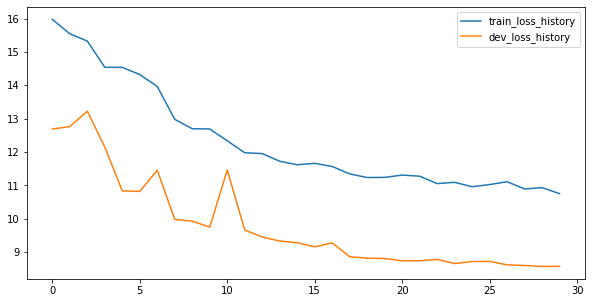

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(history['train_loss_history'], label="train_loss_history")
plt.plot(history['dev_loss_history'], label='dev_loss_history')
plt.legend(loc="upper right")
plt.show()

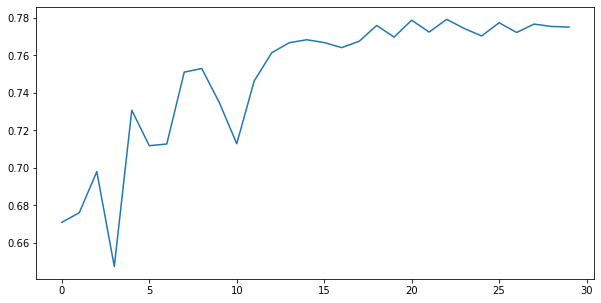

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history['dev_score_history'])
plt.show()

# Test

In [ ]:
st = """
Abhishek Jain  
Phone: +91 8359838129  
+91 7987116381  
Data Scientist  
E-Mail: abhishek33200jain@gmail.com  
Career Objective:  Seeking a position in a fast-paced, 
growth-oriented organization that enables me to utilize my skills and  grow as a professional and provides me the opportunity to acquire new skills through which I can prove  myself to be an asset to the company.  
Career Summary: Passionate, focused and confident professional with 2.5 Years of experience as Data Scientist.  Currently working as a Data Science Consultant with Tiarion Software since March 2018. Before the  current Role I have worked as Senior Analyst at Capgemini India Pvt Ldt.  

Expertise in Python libraries NumPy, Pandas, Matplotlib, Seaborn, SciKit-Learn, TensorFlow, Keras,  NLTK  
Perform exploratory data analysis to understand the problem on finance Data.  Used machine learning, data mining, predictive modelling & statistical techniques to create new  scalable models for business requirements.  
Responsible for creating actuals vs. forecast report for finance product.  
Research and implement data mining machine learning algorithms in supervised and unsupervised  learning areas along with that I have experience with CNN and ANN algorithms.  Understating of Hadoop ecosystem and exposure to work on Pyspark.  

Technical Skills:  Languages  :Python, SQL  Machine Learning : Regression, SVM, KNN, Ensemble Learning, XGBoost, K-Means Cluster,  ANN, CNN, LSTM, Text mining, Word2Vec.  Tools  :Jupyter, Spyder, PGAdmin, Tableau, IBM Watson(chatbot),  MS Excel, Salesforce (Reporting)  

Projects:  Client  Morgan Stanly Capital International ( MSCI)  Industry  Role  Finance  Analysis of data and build ML model  Predict the future cancellation for finance product and developed the model that  can predict cancellation either product will cancel or not and predict the amount of  cancellation.  
Description  - Analyze the data set and other strategies that optimize statistical efficiency and  quality.  Responsibilities  - Identify, analyze, and interpret trends or patterns in complex data sets.  - Filter and “clean” data by reviewing visualization reports.  - Work with management to prioritize business and information needs.  

- When the dataset was ready, divide the data into Train and Test dataset with the  ratio 70 and 30.  - Implement the algorithm on Train dataset to train the model and test it with Test  dataset.  -Find out the confusion matrix and performance by measuring Accuracy, recall and  Precision  Project Name  Industry  Auto Ticket Tagging System.
  ITSM  Language  Python, NLTK , Word2vec  Description  In this project, goal was to create the model that can automatically assignment the  ticket to respective team as per the issue on email.  Responsibilities - Importing the data and aggregate subject and body of the email.  - Clean the text, remove the unwanted punctuation, stopwrods, extra spaces.  - Implement MultiLabelBinarizer to convert the tags to one hot encoder.
    - Feature extraction using word2vec model.
    - When the dataset was ready, divide the data into Train and Test dataset  - -  Implement the algorithm on Train dataset to train the model and test it with Test  dataset. Find out the performance by measuring Recall, Precision and F1 score.  Work Experience :  Capgemini – Senior Analyst  May 2017 – March 2019  Tiarion Software- Data Scientist  March 2019- Present  Professional Qualification:  ••••Data Science training from DataMites Bangalore  Certification from International Association of Business Analytics Certification (IABAC).  
    Deep Learning training and Certification from Edureka.  Natural Language Processing (NLP) training and certification from Analytics Vidhya.  Academic Qualification:  Course  College/School  CGPA/%  7.6 CGPA  70%  Year of Passing  2016  B.E.(E.C)  Intermediate Saraswathi Higher secondary School Jabalpur  High School Deepak Memorial School Jabalpur  Gyan Ganga Collage of Technology Jabalpur  2012  2010  77%  Hobbies:  Excursion, Cricket, Music  Self-Declaration:  I hereby declare that the above-mentioned information is correct up to my knowledge and I bear the  responsibility for the correctness of the above-mentioned.  Abhishek Jain
"""

In [ ]:
from flair.data import Sentence

sentence = Sentence(st)

In [ ]:
from flair.models import SequenceTagger
model = SequenceTagger.load('/content/drive/My Drive/flair/model/best-model.pt')

2020-06-20 00:16:05,126 loading file /content/drive/My Drive/flair/model/best-model.pt


In [ ]:
model.predict(sentence)

[Sentence: "
 Abhishek Jain 
 Phone: +91 8359838129 
 +91 7987116381 
 Data Scientist 
 E-Mail: abhishek33200jain@gmail.com 
 Career Objective: Seeking a position in a fast-paced, 
 growth-oriented organization that enables me to utilize my skills and grow as a professional and provides me the opportunity to acquire new skills through which I can prove myself to be an asset to the company. 
 Career Summary: Passionate, focused and confident professional with 2.5 Years of experience as Data Scientist. Currently working as a Data Science Consultant with Tiarion Software since March 2018. Before the current Role I have worked as Senior Analyst at Capgemini India Pvt Ldt. 
 
 Expertise in Python libraries NumPy, Pandas, Matplotlib, Seaborn, SciKit-Learn, TensorFlow, Keras, NLTK 
 Perform exploratory data analysis to understand the problem on finance Data. Used machine learning, data mining, predictive modelling & statistical techniques to create new scalable models for business requirement

In [ ]:
for entity in sentence.get_spans('ner'):
    print(entity)

Span [92]: "Senior"   [− Labels: Designation (0.6044)]
Span [93]: "Analyst"   [− Labels: Designation (0.9685)]
Span [549]: "Saraswathi"   [− Labels: College (0.4473)]
Span [550]: "Higher"   [− Labels: College (0.7658)]
Span [551]: "secondary"   [− Labels: College (0.8552)]
Span [552]: "School"   [− Labels: College (0.9066)]
Span [553]: "Jabalpur"   [− Labels: College (0.5264)]
Span [554]: "High"   [− Labels: College (0.7023)]
Span [555]: "School"   [− Labels: College (0.8792)]
Span [556]: "Deepak"   [− Labels: College (0.4018)]
Span [557]: "Memorial"   [− Labels: College (0.8893)]
Span [558]: "School"   [− Labels: College (0.8646)]
Span [559]: "Jabalpur"   [− Labels: College (0.6974)]
Span [560]: "Gyan"   [− Labels: College (0.6024)]
Span [561]: "Ganga"   [− Labels: College (0.7251)]
Span [562]: "Collage"   [− Labels: College (0.7876)]
Span [563]: "of"   [− Labels: College (0.9195)]
Span [564]: "Technology"   [− Labels: College (0.8515)]
Span [565]: "Jabalpur"   [− Labels: College (0.9